<a href="https://colab.research.google.com/github/garedo/Machine-Learning/blob/main/sentiment_analysis_on_tweets_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdu√ß√£o

Este notebook foi baseado no exemplo: [kaggle notebook](https://www.kaggle.com/viniciuscleves/an-lise-de-sentimento-com-bert). Sendo que foi adaptado para depois do treinamento realizar crawler no Twitter e fazer algumas predi√ß√µes.

Therefore, on this notebook I will:

1. Carregar os dados e utilizar apenas uma parte por limita√ß√£o de tempo.
2. Treinar e avaliar em um classificador BERT.
3. Avaliar o modelo em dados em tempo real sobre as elei√ß√µes. 

In [ ]:
!pip install transformers datasets --upgrade --quiet

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.3 MB 33.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 441 kB 60.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7.6 MB 60.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 163 kB 55.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 212 kB 67.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115 kB 74.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 127 kB 72.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115 kB 50.2 MB/s 


Intala√ß√£o de pacotes

In [ ]:
ddsd

In [ ]:
import math
import os
import pickle
import re
from dataclasses import dataclass

import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn.functional as F
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_recall_fscore_support)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from tqdm.notebook import tqdm
from transformers import (AdamW, AutoConfig, BertTokenizer,
                          DataCollatorWithPadding, AutoTokenizer, pipeline,
                          AutoModelForSequenceClassification, 
                          get_linear_schedule_with_warmup)

import os
from tqdm.notebook import tqdm
from google.colab import drive

datasets.logging.set_verbosity_error()
nltk.download('stopwords')
nltk.download('punkt')
tqdm.pandas()

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Montagem do drive para ter acesso aos dados**

In [ ]:
drive.mount('/content/gdrive')
base_path = "/content/gdrive/MyDrive/Minicurso ERI-GO/"

Mounted at /content/gdrive


# Carrega os dados de textos do Twitter


In [ ]:
def load_data():
    no_theme = pd.read_csv(base_path + 'data/NoThemeTweets.csv', index_col=0)
    no_theme['type'] = 'no_theme-'

    with_theme = pd.read_csv(base_path + 'data/TweetsWithTheme.csv', index_col=0)
    with_theme['type'] = 'with_theme-'

    data = pd.concat([no_theme, with_theme])
    data['type'] = data['type'] + data['sentiment']
    # Remove twetts duplicados
    data = data[~data.index.duplicated(keep='first')]
    
    dataset_size = 0.05
    discard, data = train_test_split(data, test_size=dataset_size, random_state=42, stratify=data['type'])
    
    neutrals = pd.read_csv(base_path + 'data/TweetsNeutralNews.csv', index_col=0)
    neutrals['type'] = 'neutrals-'
    
    dataset_size = 0.55
    discard, neutrals = train_test_split(neutrals, test_size=dataset_size, random_state=42, stratify=neutrals['type'])
    
    data = pd.concat([data, neutrals])
    
    return data

data = load_data()

condicoes = [
    data.sentiment.eq("Negativo"), 
    data.sentiment.eq("Positivo"),
    data.sentiment.eq("Neutro")
]

valores = [0, 1, 2]

data['labels'] = np.select(condicoes, valores)

In [ ]:
def clean_text(text):
    """
    Script used for cleaning corpus in order to train word embeddings.
    All emails are mapped to a EMAIL token.
    All numbers are mapped to 0 token.
    All urls are mapped to URL token.
    Different quotes are standardized.
    Different hiphen are standardized.
    HTML strings are removed.
    All text between brackets are removed.
    All sentences shorter than 5 tokens were removed.
    ...
    """
    sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')

    # Punctuation list
    punctuations = re.escape('!"#%\'()*+,./:;<=>?@[\\]^_`{|}~')

    # ##### #
    # Regex #
    # ##### #
    re_remove_brackets = re.compile(r'\{.*\}')
    re_remove_html = re.compile(r'<(\/|\\)?.+?>', re.UNICODE)
    re_transform_numbers = re.compile(r'\d', re.UNICODE)
    re_transform_usernames = re.compile(r'(^|[^@\w])@(\w{1,15})\b', re.UNICODE)
    re_transform_url = re.compile(r'(http|https)://[^\s]+', re.UNICODE)
    # Different quotes are used.
    re_quotes_1 = re.compile(r"(?u)(^|\W)[‚Äò‚Äô‚Ä≤`']", re.UNICODE)
    re_quotes_2 = re.compile(r"(?u)[‚Äò‚Äô`‚Ä≤'](\W|$)", re.UNICODE)
    re_quotes_3 = re.compile(r'(?u)[‚Äò‚Äô`‚Ä≤‚Äú‚Äù]', re.UNICODE)
    re_dots = re.compile(r'(?<!\.)\.\.(?!\.)', re.UNICODE)
    re_punctuation = re.compile(r'([,";:]){2},', re.UNICODE)
    re_hiphen = re.compile(r' -(?=[^\W\d_])', re.UNICODE)
    re_tree_dots = re.compile(u'‚Ä¶', re.UNICODE)
    # Differents punctuation patterns are used.
    re_punkts = re.compile(r'(\w+)([%s])([ %s])' %
                           (punctuations, punctuations), re.UNICODE)
    re_punkts_b = re.compile(r'([ %s])([%s])(\w+)' %
                             (punctuations, punctuations), re.UNICODE)
    re_punkts_c = re.compile(r'(\w+)([%s])$' % (punctuations), re.UNICODE)
    re_changehyphen = re.compile(u'‚Äì')
    re_doublequotes_1 = re.compile(r'(\"\")')
    re_doublequotes_2 = re.compile(r'(\'\')')
    re_trim = re.compile(r' +', re.UNICODE)

    """Apply all regex above to a given string."""
    text = text.lower()
    text = re_tree_dots.sub('...', text)
    text = re.sub('\.\.\.', '', text)
    text = re_remove_brackets.sub('', text)
    text = re_changehyphen.sub('-', text)
    text = re_remove_html.sub(' ', text)
    text = re_transform_numbers.sub('0', text)
    text = re_transform_url.sub('URL', text)
    text = re_transform_usernames.sub(' username ', text)
    text = re_quotes_1.sub(r'\1"', text)
    text = re_quotes_2.sub(r'"\1', text)
    text = re_quotes_3.sub('"', text)
    text = re.sub('"', '', text)
    text = re_dots.sub('.', text)
    text = re_punctuation.sub(r'\1', text)
    text = re_hiphen.sub(' - ', text)
    text = re_punkts.sub(r'\1 \2 \3', text)
    text = re_punkts_b.sub(r'\1 \2 \3', text)
    text = re_punkts_c.sub(r'\1 \2', text)
    text = re_doublequotes_1.sub('\"', text)
    text = re_doublequotes_2.sub('\'', text)
    text = re_trim.sub(' ', text)
    return text.strip()

**Pr√© Processamento dos dados**


1.   Remo√ß√£o de pontos
2.   Remo√ß√£o de n√∫meros
3.   Remo√ß√£o de URLs
4.   Remover palavras e d√≠gitos que contenham d√≠gitos
5.   Remover nomes dos usu√°rios
6.   *Expandir contra√ß√µes*
7.   *Stopwords*
8.   *Stemming and Lemmatization*

Stemming
Reduz a palavra √† sua raiz

Lemmatization
Reduz a palavra √† sua raiz, retirando todas as inflex√µes

In [ ]:
data['tweet_text'] = data['tweet_text'].progress_apply(clean_text)

# Remove linhas com tamanho menor que 5
data["text_length"]= data["tweet_text"].str.len()
data = data[data["text_length"] > 5]
data.drop('text_length', axis=1, inplace=True)

  0%|          | 0/62367 [00:00<?, ?it/s]

In [ ]:
data.head()

tweet_text  \
id                                                                       
1037139518305062912                   username eu gosto tanto de vc :(   
1034460603849625600                                     musica : d url   
1030274394780848128  username username username username username u...   
1033561586600996864  gente to mto triste socorro , fazem 0 horas q ...   
1037424539163156480  tinha uma ideia para passar os meus 00 anos ma...   

                                         tweet_date sentiment query_used  \
id                                                                         
1037139518305062912  Wed Sep 05 00:45:04 +0000 2018  Negativo         :(   
1034460603849625600  Tue Aug 28 15:20:01 +0000 2018  Positivo         :)   
1030274394780848128  Fri Aug 17 02:05:31 +0000 2018  Positivo         :)   
1033561586600996864  Sun Aug 26 03:47:39 +0000 2018  Negativo         :(   
1037424539163156480  Wed Sep 05 19:37:39 +0000 2018  Negativo         :(   

                                  type  labels  
id                                              
1037139518305062912  no_theme-Negativo       0  
1034460603849625600  no_theme-Positivo       1  
1030274394780848128  no_theme-Positivo       1  
1033561586600996864  no_theme-Negativo       0  
1037424539163156480  no_theme-Negativo       0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62367 entries, 1037139518305062912 to 1035675825511776257
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  62367 non-null  object
 1   tweet_date  62367 non-null  object
 2   sentiment   62367 non-null  object
 3   query_used  62367 non-null  object
 4   type        62367 non-null  object
 5   labels      62367 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.3+ MB


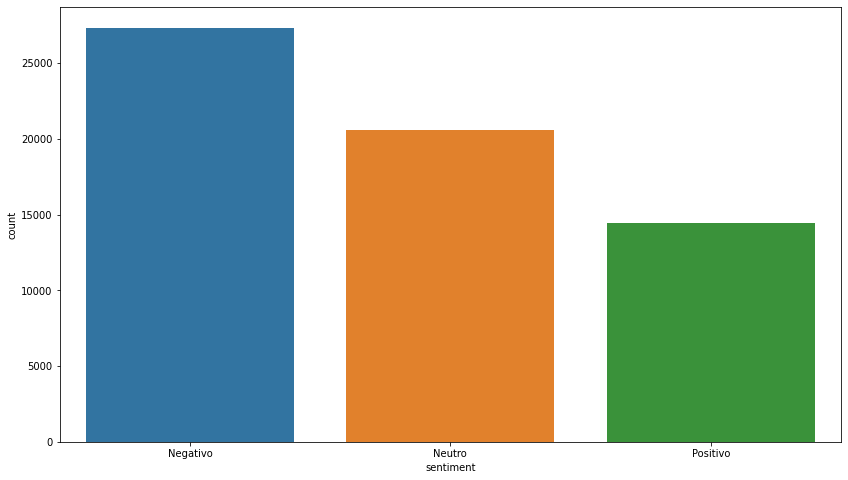

In [ ]:
plt.figure(figsize=(14, 8))
p = sns.countplot(data=data, x = 'sentiment', order = data['sentiment'].value_counts().index)

## Prepara√ß√£o dos dados para treinamento

In [ ]:
def create_splits(data):
    test_validation_size = 0.10
    train_validation, test = train_test_split(data, test_size=test_validation_size, random_state=42, stratify=data['type'])
    train, validation = train_test_split(train_validation, test_size=test_validation_size, random_state=42, stratify=train_validation['type'])
    return train, validation, test
train, validation, test = create_splits(data)

print('Training samples:  ', train.shape[0])
print('Validation samples:', validation.shape[0])
print('Test samples:      ', test.shape[0])

Training samples:   50517
Validation samples: 5613
Test samples:       6237


In [ ]:
def build_dataset(tokenizer, splits):
    train, validation, test = splits
    # Carrega do disco os Datasets, isso √∫til quando voc√™ tem um conjunto de dados muito grande que n√£o cabe na mem√≥ria
    train.to_csv('train_split.csv')
    validation.to_csv('validation_split.csv')
    test.to_csv('test_split.csv')
    dataset = datasets.load_dataset('csv', data_files={'train': 'train_split.csv',
                                                       'validation':'validation_split.csv',
                                                       'test': 'test_split.csv'})
    dataset = dataset.map(lambda example: {'unbiased_text': re.sub(r':[\)\(]+', '', example['tweet_text'])}, batched=False)
    dataset = dataset.map(lambda examples: tokenizer(examples['unbiased_text']), batched=True)
    dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
    
    return dataset

## Modelo Baseline

In [ ]:
stemmer = nltk.stem.snowball.PortugueseStemmer()
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc) if w[0]!='@')

vectorizer = TfidfVectorizer(
    stop_words=nltk.corpus.stopwords.words('portuguese'), 
    analyzer=stemmed_words,
    min_df=0.0001, 
    max_features=100000, 
    max_df=0.8)

X_train = vectorizer.fit_transform(train['tweet_text'].apply(lambda s: re.sub(r':[\)\(]+', '', s)))
X_validation = vectorizer.transform(validation['tweet_text'].apply(lambda s: re.sub(r':[\)\(]+', '', s)))
X_test = vectorizer.transform(test['tweet_text'].apply(lambda s: re.sub(r':[\)\(]+', '', s)))

y_train = train['labels'].values
y_validation = validation['labels'].values
y_test = test['sentiment'].values

In [ ]:
target_names = data['sentiment'].unique()

In [ ]:
lr = LogisticRegression(random_state=0, class_weight='balanced', max_iter=500, verbose=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=target_names))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

    Negativo       0.85      0.76      0.80      2460
    Positivo       0.62      0.70      0.66      1302
      Neutro       0.95      0.99      0.97      1851

    accuracy                           0.82      5613
   macro avg       0.80      0.82      0.81      5613
weighted avg       0.83      0.82      0.82      5613



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


In [ ]:
!nvidia-smi

Wed Oct 26 18:12:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Treinamento do modelo (BERT)

Fun√ß√µes helpers:


*   Calcula m√©tricas de avalia√ß√£o do modelo
*   Envia os dados para o device



In [ ]:
def compute_metrics(preds, labels):
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

def send_inputs_to_device(inputs, device):
    return {key:tensor.to(device) for key, tensor in inputs.items()}

Carrega o modelo base, define um otimizador, um escalonador para controlar a taxa de aprendizado, para a realiza√ß√£o do treinamento

In [ ]:
id2label, label2id = {}, {}

for i, key in enumerate(data.sentiment.unique()):
  id2label[i] = key
  label2id[key] = i

In [ ]:
num_epochs = 1
num_warmup_steps = 5000
num_labels = len(data.sentiment.unique())
model_base = "neuralmind/bert-base-portuguese-cased"

tokenizer = BertTokenizer.from_pretrained(model_base)
model = AutoModelForSequenceClassification.from_pretrained(model_base, num_labels = num_labels)
config = AutoConfig.from_pretrained(model_base, num_labels = num_labels, finetuning_task = None)

#Configurar o de para classes para o model Bert\
model.config.id2label = id2label
model.config.label2id = label2id

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.train().to(device)

optimizer = AdamW(model.parameters(), lr = 5e-6)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_epochs*len(train))

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the

Configurando os dados com o tokenizadores do Huggingface o modelo base para o finetunning.

In [ ]:
dataset = build_dataset(tokenizer, (train, validation, test))

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-37d26f1fc243845e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/50517 [00:00<?, ?ex/s]

  0%|          | 0/5613 [00:00<?, ?ex/s]

  0%|          | 0/6237 [00:00<?, ?ex/s]

  0%|          | 0/51 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

"Carregadores" dos dados

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset['train'], batch_size=16, collate_fn=DataCollatorWithPadding(tokenizer))
validation_loader = torch.utils.data.DataLoader(dataset['validation'], batch_size=32, collate_fn=DataCollatorWithPadding(tokenizer))
test_loader = torch.utils.data.DataLoader(dataset['test'], batch_size=32, collate_fn=DataCollatorWithPadding(tokenizer))

Fun√ß√£o para realiza√ß√£o da predi√ß√£o

In [ ]:
def predict(model, validation_loader, device):
    with torch.no_grad():
        model.eval()
        preds = []
        labels = []
        validation_losses = []
        for inputs in tqdm(validation_loader):
            labels.append(inputs['labels'].numpy())
            
            inputs = send_inputs_to_device(inputs, device)
            loss, scores = model(**inputs)[:2]
            validation_losses.append(loss.cpu().item())

            _, classifications = torch.max(scores, 1)
            preds.append(classifications.cpu().numpy())
        model.train()
    return np.concatenate(preds), np.concatenate(labels)

Treinamento do modelo

In [ ]:
epoch_bar = tqdm(range(num_epochs))
loss_acc = 0
alpha = 0.95
for epoch in epoch_bar:
  batch_bar = tqdm(enumerate(train_loader), desc = f'Epoch {epoch}', total = len(train_loader))
  for idx, inputs in batch_bar:
    inputs = send_inputs_to_device(inputs, device)
    #define os gradientes como zero antes de come√ßar a fazer
    #retropropaga√ß√£o
    #porque o PyTorch acumula os gradientes em passagens
    #posteriores subsequentes
    optimizer.zero_grad()

    loss, logits = model(**inputs)[:2]

    #Calcula a perda (backpropagation)
    loss.backward()

    #Executa uma atualiza√ß√£o de par√¢metro com base no gradiente atual
    optimizer.step()

    #Calcula a loss para exibi√ß√£o
    if epoch == 0 and idx == 0:
      loss_acc = loss.cpu().item()
    else:
      loss_acc = loss_acc * alpha + (1-alpha) * loss.cpu().item()

    batch_bar.set_postfix(loss = loss_acc)

    if idx%2000 == 0:
      preds, labels = predict(model, validation_loader, device)
      metrics = compute_metrics(preds, labels)
      print(metrics)
    scheduler.step()

  model.save_pretrained(base_path + 'checkpoints/epoch' + str(epoch))
  

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/3158 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

{'accuracy': 0.4436130411544629, 'f1': 0.32354877276741434, 'precision': 0.41664817846702795, 'recall': 0.4436130411544629}


  0%|          | 0/176 [00:00<?, ?it/s]

{'accuracy': 0.8528416176732585, 'f1': 0.8420977360927798, 'precision': 0.8545669207162804, 'recall': 0.8528416176732585}


Avalia√ß√£o do modelo nos dados de testes

In [ ]:
preds, labels = predict(model, test_loader, device)

print(classification_report(labels, preds, target_names = target_names))

  0%|          | 0/195 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    Negativo       0.86      0.88      0.87      2734
    Positivo       0.76      0.72      0.74      1447
      Neutro       0.99      1.00      0.99      2056

    accuracy                           0.88      6237
   macro avg       0.87      0.86      0.87      6237
weighted avg       0.88      0.88      0.88      6237



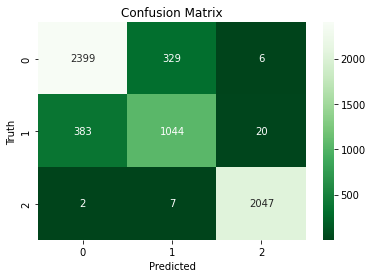

In [ ]:
ax = sns.heatmap(confusion_matrix(labels, preds), cmap='Greens_r', annot=True, fmt='d')
_ = ax.set(xlabel='Predicted', ylabel='Truth', title='Confusion Matrix')

# Avaliar modelo em dados recentes sobre as elei√ß√µes


In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy as tweepy
import sqlite3
import json
import sys

In [ ]:
with open(base_path + "credentials.json", "r") as f:
    credentials = json.loads(f.read())

In [ ]:
# Security keys to my app Twitter
consumer_key = credentials["consumer_key"]
consumer_secret = credentials["consumer_secret"]
access_token = credentials["access_token"]
access_token_secret = credentials["access_token_secret"]

In [ ]:
# Auth on Twitter
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Classe de captura dados no Twitter e armazenar em um banco de dados SQLite
class TwitterListener(StreamListener):
    exclusion = 'ao vivo'

    def __init__(self):
        self.conn = sqlite3.connect('gdrive/MyDrive/Colab_Notebooks/erigo_2022/twitter_eleicoes.db')

    def on_data(self, dados):
        tweet = json.loads(dados)
        created_at = tweet["created_at"]
        id_str = tweet["id_str"]
        text = tweet["text"]

        if (text.lower().find(self.exclusion) >= 0 and text.lower().find('rt') >= 0):
            return True

        try:
            # Evita dados duplicados
            cur = self.conn.cursor()
            cur.execute("SELECT COUNT(id) FROM tweet WHERE id = ? OR text = ?", (id_str , text))
            for linha in cur.fetchall():
                if (linha[0] > 0):
                    return True

            cur.close()

            cur = self.conn.cursor()
            sql_insert = 'INSERT INTO tweet(id, text) VALUES (?, ?)'
            rec = (id_str, text)
            cur.execute(sql_insert, rec)
            self.conn.commit()
        except Exception as ex:
            self.conn.commit()
            self.conn.close()
            print(ex)
        
        return True

    def on_status(self, status):
        print(status.text)
        
    def on_error(self, status_code):
        print(status_code)

In [ ]:
keywords = ['Bolsonaro', 'Lula']

In [ ]:
# Creating the listener
twitterlistener = TwitterListener()

# Creating the twitterstream object
twitterstream = Stream(auth = api.auth, listener = twitterlistener)

In [ ]:
# Starting the filter and saving the tweets in SQLite
twitterstream.filter(languages=["pt"], track=keywords)

In [ ]:
twitterstream.disconnect()

In [ ]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(base_path + "data/twitter_eleicoes.db")
df = pd.read_sql_query("SELECT * FROM tweet", con)
con.close()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           417 non-null    object
 1   text         417 non-null    object
 2   label_value  0 non-null      object
 3   label        0 non-null      object
dtypes: object(4)
memory usage: 13.2+ KB


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
df.loc[:,['id', 'text']].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


id                                                                                                                                           text
0  1584390960414593025  RT @ptbrasil: "Assim como o senhor @LulaOficial t√° assinando minha carteira, eu sei que daqui pra frente v√£o ter muitos brasileiros com car‚Ä¶ 
1  1584390960670117888  RT @AndreJanonesAdv: URGENTE! Movimenta√ß√£o intensa aqui nos arredores do pal√°cio do alvorada neste momento. Me hospedei pr√≥ximo estrategica‚Ä¶ 
2  1584390960712388608  RT @RachelSherazade: Enquanto Roberto Jefferson ocupa o notici√°rio, Paulo Guedes, o ministro de Bolsonaro, segue seu projeto de enfraquecer‚Ä¶ 
3  1584390960707817472  RT @LulaPelaVerdade: Em entrevista √† Record, Bolsonaro despejou seu habitual caminh√£o de mentiras.\n\nForam pelo menos 37 ataques mentirosos‚Ä¶
4  1584390961328984064  RT @GugaNoblat: Quando Lula foi preso depois de um julgamento que ele dizia ilegal e depois se mostrou ilegal, ele n√£o atirou. Quando Dilma‚Ä¶ 
5  1584390961542537217  RT @_Janoninho: Filha de Roberto Jefferson admite que pai pode pedir indulto a Bolsonaro: 'Se precisar, ele vai nos ajudar'. O Globo         
6  1584390961526099969  LULA n√£o e mais lula.agora √© vulgo FUJAOü§£ü§£ü§£ü§£üëçüèøüëçüèø                                                                                             
7  1584390960754003969  Maior acerto de Lula naquele debate foi enquadrar esse falso padre picareta. Disse naquela ocasi√£o e repito hoje. E‚Ä¶ https://t.co/MaKIpfn1XX 
8  1584390962260094976  RT @felipeneto: Vcs t√™m no√ß√£o q se os policiais federais tivessem ca√≠do na isca e atirado de volta no Roberto Jeff, bolsonaro teria consegu‚Ä¶ 
9  1584390962637590528  RT @taoquei1: O arregao desesperado n√£o vai ao debate e vai dar 1h de sabatina ao presidente Bolsonaro na Record hj, as 21:30. Divulguem.\n#‚Ä¶

In [ ]:
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
path_of_model = base_path + 'checkpoints/epoch0'
model = AutoModelForSequenceClassification.from_pretrained(path_of_model)

In [ ]:
nlp = pipeline('sentiment-analysis', model = model, tokenizer = tokenizer)

In [ ]:
for index, row in df.iterrows():
  text_sentence = row[1]
  result = nlp(text_sentence)
  print(row[0], result)

  if index == 10:
    break

1584390960414593025 [{'label': 'Positivo', 'score': 0.7700322270393372}]
1584390960670117888 [{'label': 'Positivo', 'score': 0.90633225440979}]
1584390960712388608 [{'label': 'Positivo', 'score': 0.42576947808265686}]
1584390960707817472 [{'label': 'Positivo', 'score': 0.5561563968658447}]
1584390961328984064 [{'label': 'Positivo', 'score': 0.5891438126564026}]
1584390961542537217 [{'label': 'Neutro', 'score': 0.9897881746292114}]
1584390961526099969 [{'label': 'Positivo', 'score': 0.591251790523529}]
1584390960754003969 [{'label': 'Positivo', 'score': 0.790730893611908}]
1584390962260094976 [{'label': 'Positivo', 'score': 0.7002449631690979}]
1584390962637590528 [{'label': 'Positivo', 'score': 0.8522172570228577}]
1584390962868293632 [{'label': 'Positivo', 'score': 0.7622814774513245}]


# Conclus√£o

Os modelos de l√≠ngua tem melhores resultados do que modelos de baseline.

**Obrigado!**